In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import re

### Removing Noise and converting to numeric

In [4]:
df = pd.read_csv("doctor (1).csv")
df

,Name,Degree,DP Score,NPV Value,Location,City,Consult Fee,Years of Experience,Speciality
0,Dr. Manish Agarwal,"MBBS, MS - General Surgery",93%,(61 votes),Saket,Delhi,₹900,26,"General Surgeon, Laparoscopic Surgeon"
1,Dr. Pallavi Joshi,BHMS,100%,(91 votes),Saket,Delhi,₹500,16,AYUSHHomoeopath
2,Dr. Shikha Gurnani,"MBBS, DNB - Obstetrics & Gynecology",98%,(1312 votes),Dwarka,Delhi,₹800,20,"Gynecologist, Obstetrician"
3,Dr. Sanneya Manchanda,"BDS, MDS - Conservative Dentistry & Endodontics",100%,(122 votes),Jangpura,Delhi,₹400,10,"Dentist, Endodontist, Conservative Dentist, Re..."
4,Dr. Pearl Bhardwaj,"BDS, MDS - Periodontics",NaN,NaN,Model Town 2,Delhi,₹400,10,"Dentist, Implantologist, Periodontist"
...,...,...,...,...,...,...,...,...,...
8040,Dr. Amrith Kiran Shetty,"BDS, Certificate in Dental Implants",96%,(609 votes),Banaswadi,Bangalore,₹500,20,"Dental Surgeon, Dentist, Implantologist"
8041,Dr. Smitha M,"BDS, MDS - Paedodontics And Preventive Dentistry",91%,(22 votes),RT Nagar,Bangalore,₹400,23,Pediatric Dentist
8042,Dr. Shamraz Abbas (Physiotherapist),BPTh/BPT,NaN,NaN,BTM Layout 2nd Stage,Bangalore,₹500,10,TherapistPhysiotherapist
8043,Dr. Lohith U,"MBBS, MS - General Surgery, DNB - Surgical Gas...",100%,(15 votes),Sarjapur Road,Bangalore,₹850,15,"Laparoscopic Surgeon, GastroIntestinal Surgeon"


In [5]:
df['DP Score'] = df['DP Score'].str.replace('%', '', regex=True)
df['DP Score'] = pd.to_numeric(df['DP Score'], errors='coerce')

In [6]:
df['NPV Value']=df['NPV Value'].str.split(' ').str[0]

df['NPV Value']= df['NPV Value'].str[1:]

df['NPV Value'] = pd.to_numeric(df['NPV Value'], errors='coerce')

df['NPV Value'].unique()

array([  61.,   91., 1312.,  122.,   nan,  829.,   12.,   34.,  168.,
         16.,   39.,   31.,  136.,   72.,   17.,  207.,  149.,   23.,
        490.,   63.,   74.,  340.,  378.,  119.,   99.,  166.,  141.,
         45.,   13.,  151.,   19.,   49.,   14.,  153.,   46.,  205.,
         80.,  246.,  200.,   21.,   73.,   83.,  370.,   58.,  410.,
         40.,  474.,  117.,   29., 1471.,   98.,   36.,   22.,   15.,
         50.,  139.,   81.,   59.,   78.,  996.,   25.,  193.,  327.,
        106.,  118.,   27.,  384.,  101.,   38.,  115.,   53.,   35.,
       1072.,   33.,  150.,  131.,   41.,   32.,   95., 1286.,  331.,
        566.,  413.,   26.,  350.,   42.,   94.,   67.,  233.,  251.,
        492.,   51.,   62.,   28.,  336.,  146.,  487.,  587.,   47.,
        156.,  181.,   43.,  138.,   82.,   88.,  428.,   24.,   69.,
         11.,  109.,  133.,  187.,  289.,   18.,   57.,  315.,  935.,
        858.,  110.,  316.,   52.,  293.,  145.,   60.,  369.,  120.,
        185.,  523.,

In [7]:
df['Consult Fee']=df['Consult Fee'].str[1:]

df['Consult Fee'] = pd.to_numeric(df['Consult Fee'], errors='coerce')

df['Consult Fee'].unique()

array([ 900.,  500.,  800.,  400., 1050., 1000.,  700., 1500., 1100.,
       1200.,  799., 3500., 2000.,  600.,  950., 1800., 1700.,   99.,
        300.,  200., 5000., 2500., 1400.,  850., 1300., 2200.,  299.,
       1600., 4000., 1150.,  350.,  100.,  450.,  750.,   50.,  999.,
         nan,  330., 3000.,  199., 1850.,  550., 1450., 1250., 2600.,
        699.,  650., 5900.,  349.,  599.,  250., 1750., 2100., 1950.,
       2400., 2250., 3200.,  499.,  669., 1550., 2800., 4300., 1475.,
        150., 2300., 4100., 2700., 2850.,  390.,  530., 3850., 1900.,
       3300., 2350., 3400., 3600.,  740.,  399.,  670., 1120., 1499.,
       1090.,  480.,  560.,  630.,  980., 1650., 2950., 2130.,  325.,
       2830.,  320.,  660.])

In [8]:
df['Years of Experience'] = df['Years of Experience'].apply(lambda x: re.sub('[^0-9]', '', str(x)))


In [9]:
df['Years of Experience'] = pd.to_numeric(df['Years of Experience'], errors='coerce')

In [10]:
df.isnull().sum()

Name                      1
Degree                    2
DP Score               3283
NPV Value              3283
Location                  1
City                      1
Consult Fee              51
Years of Experience       3
Speciality                4
dtype: int64

In [11]:
df.corr()

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,DP Score,NPV Value,Consult Fee,Years of Experience
DP Score,1.000000,0.116738,-0.166926,-0.333568
NPV Value,0.116738,1.000000,-0.029123,0.057889
Consult Fee,-0.166926,-0.029123,1.000000,0.296974
Years of Experience,-0.333568,0.057889,0.296974,1.000000


In [12]:
df

,Name,Degree,DP Score,NPV Value,Location,City,Consult Fee,Years of Experience,Speciality
0,Dr. Manish Agarwal,"MBBS, MS - General Surgery",93.0,61.0,Saket,Delhi,900.0,26.0,"General Surgeon, Laparoscopic Surgeon"
1,Dr. Pallavi Joshi,BHMS,100.0,91.0,Saket,Delhi,500.0,16.0,AYUSHHomoeopath
2,Dr. Shikha Gurnani,"MBBS, DNB - Obstetrics & Gynecology",98.0,1312.0,Dwarka,Delhi,800.0,20.0,"Gynecologist, Obstetrician"
3,Dr. Sanneya Manchanda,"BDS, MDS - Conservative Dentistry & Endodontics",100.0,122.0,Jangpura,Delhi,400.0,10.0,"Dentist, Endodontist, Conservative Dentist, Re..."
4,Dr. Pearl Bhardwaj,"BDS, MDS - Periodontics",NaN,NaN,Model Town 2,Delhi,400.0,10.0,"Dentist, Implantologist, Periodontist"
...,...,...,...,...,...,...,...,...,...
8040,Dr. Amrith Kiran Shetty,"BDS, Certificate in Dental Implants",96.0,609.0,Banaswadi,Bangalore,500.0,20.0,"Dental Surgeon, Dentist, Implantologist"
8041,Dr. Smitha M,"BDS, MDS - Paedodontics And Preventive Dentistry",91.0,22.0,RT Nagar,Bangalore,400.0,23.0,Pediatric Dentist
8042,Dr. Shamraz Abbas (Physiotherapist),BPTh/BPT,NaN,NaN,BTM Layout 2nd Stage,Bangalore,500.0,10.0,TherapistPhysiotherapist
8043,Dr. Lohith U,"MBBS, MS - General Surgery, DNB - Surgical Gas...",100.0,15.0,Sarjapur Road,Bangalore,850.0,15.0,"Laparoscopic Surgeon, GastroIntestinal Surgeon"


In [13]:
df["NPV Value"].mean()

189.95338093238135

In [14]:
df["DP Score"].mean()

94.18290634187316

In [15]:
df['NPV Value'].fillna(190, inplace=True)

In [16]:
df['DP Score'].fillna(94,inplace = True)

In [17]:
df.dtypes

Name                    object
Degree                  object
DP Score               float64
NPV Value              float64
Location                object
City                    object
Consult Fee            float64
Years of Experience    float64
Speciality              object
dtype: object

In [18]:
df.isnull().sum()

Name                    1
Degree                  2
DP Score                0
NPV Value               0
Location                1
City                    1
Consult Fee            51
Years of Experience     3
Speciality              4
dtype: int64

In [19]:
df.dropna(inplace= True)

In [20]:
df.isnull().sum()

Name                   0
Degree                 0
DP Score               0
NPV Value              0
Location               0
City                   0
Consult Fee            0
Years of Experience    0
Speciality             0
dtype: int64

In [21]:
speciality=[]
for i in df.Speciality:
    speciality.append(i)
print(speciality)

['General Surgeon, Laparoscopic Surgeon', 'AYUSHHomoeopath', 'Gynecologist, Obstetrician', 'Dentist, Endodontist, Conservative Dentist, Restorative Dentist', 'Dentist, Implantologist, Periodontist', 'Gynecologist, Obstetrician, Infertility Specialist, Laparoscopic Surgeon (Obs & Gyn)', 'Laparoscopic Surgeon, Proctologist, General Surgeon', 'Dermatologist', 'General Surgeon, Laparoscopic Surgeon, Bariatric Surgeon', 'Hair Transplant Surgeon', 'Laparoscopic Surgeon, Bariatric Surgeon, General Surgeon', 'Gynecologist, Obstetrician, Infertility Specialist, Laparoscopic Surgeon (Obs & Gyn)', 'Dermatologist, Hair Transplant Surgeon', 'Gynecologist, Obstetrician, Infertility Specialist, Laparoscopic Surgeon (Obs & Gyn)', 'General Physician', 'Neurosurgeon, Neurologist, General Surgeon, Spine Surgeon (Neuro)', 'Bariatric Surgeon, Laparoscopic Surgeon', 'Endodontist, Dentist, Cosmetic/Aesthetic Dentist, Implantologist', 'Gynecologist, Infertility Specialist, Obstetrician', 'Pediatrician', 'Pros

In [22]:
df

,Name,Degree,DP Score,NPV Value,Location,City,Consult Fee,Years of Experience,Speciality
0,Dr. Manish Agarwal,"MBBS, MS - General Surgery",93.0,61.0,Saket,Delhi,900.0,26.0,"General Surgeon, Laparoscopic Surgeon"
1,Dr. Pallavi Joshi,BHMS,100.0,91.0,Saket,Delhi,500.0,16.0,AYUSHHomoeopath
2,Dr. Shikha Gurnani,"MBBS, DNB - Obstetrics & Gynecology",98.0,1312.0,Dwarka,Delhi,800.0,20.0,"Gynecologist, Obstetrician"
3,Dr. Sanneya Manchanda,"BDS, MDS - Conservative Dentistry & Endodontics",100.0,122.0,Jangpura,Delhi,400.0,10.0,"Dentist, Endodontist, Conservative Dentist, Re..."
4,Dr. Pearl Bhardwaj,"BDS, MDS - Periodontics",94.0,190.0,Model Town 2,Delhi,400.0,10.0,"Dentist, Implantologist, Periodontist"
...,...,...,...,...,...,...,...,...,...
8040,Dr. Amrith Kiran Shetty,"BDS, Certificate in Dental Implants",96.0,609.0,Banaswadi,Bangalore,500.0,20.0,"Dental Surgeon, Dentist, Implantologist"
8041,Dr. Smitha M,"BDS, MDS - Paedodontics And Preventive Dentistry",91.0,22.0,RT Nagar,Bangalore,400.0,23.0,Pediatric Dentist
8042,Dr. Shamraz Abbas (Physiotherapist),BPTh/BPT,94.0,190.0,BTM Layout 2nd Stage,Bangalore,500.0,10.0,TherapistPhysiotherapist
8043,Dr. Lohith U,"MBBS, MS - General Surgery, DNB - Surgical Gas...",100.0,15.0,Sarjapur Road,Bangalore,850.0,15.0,"Laparoscopic Surgeon, GastroIntestinal Surgeon"


In [23]:
Dentist = df[df['Speciality'].str.contains('Dentist', case = False)]
Dentist['Speciality'] = 'Dentist'
df = df[~(df['Speciality'].str.contains('Dentist', case = False))]

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\1977123895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dentist['Speciality'] = 'Dentist'


In [24]:
Gynecologist = df[df['Speciality'].str.contains('Gynecologist', case = False)]
Gynecologist['Speciality'] = 'Gynecologist'
df = df[~(df['Speciality'].str.contains('Gynecologist', case = False))]

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\359673948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gynecologist['Speciality'] = 'Gynecologist'


In [25]:
Pediatrician = df[df['Speciality'].str.contains('Pediatrician', case = False)]
Pediatrician['Speciality'] = 'Pediatrician'
df = df[~(df['Speciality'].str.contains('Pediatrician', case = False))]

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\339426651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pediatrician['Speciality'] = 'Pediatrician'


In [26]:
Orthopedist = df[df['Speciality'].str.contains('Ortho', case = False)]
Orthopedist['Speciality'] = 'Orthopedist'
df = df[~(df['Speciality'].str.contains('Ortho', case = False))]

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\722785023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Orthopedist['Speciality'] = 'Orthopedist'


In [27]:
Ophthalmologist = df[df['Speciality'].str.contains('Ophthalmologist', case = False)]
Ophthalmologist['Speciality'] = 'Ophthalmologist'
df = df[~(df['Speciality'].str.contains('Ophthalmologist', case = False))]

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\3214511333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ophthalmologist['Speciality'] = 'Ophthalmologist'


In [28]:
Physiotherapist = df[df['Speciality'].str.contains('Physiotherapist', case = False)]
Physiotherapist['Speciality'] = 'Physiotherapist'
df = df[~(df['Speciality'].str.contains('Physiotherapist', case = False))]

Physician = df[df['Speciality'].str.contains('Physician', case = False)]
Physician['Speciality'] = 'Physiotherapist'
df = df[~(df['Speciality'].str.contains('Physician', case = False))]

Physiotherapist = pd.concat([Physician, Physiotherapist])

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\3958096773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Physiotherapist['Speciality'] = 'Physiotherapist'
C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\3958096773.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Physician['Speciality'] = 'Physiotherapist'


In [29]:
Dermatologist = df[df['Speciality'].str.contains('Dermatologist', case = False)]
Dermatologist['Speciality'] = 'Dermatologist'
df = df[~(df['Speciality'].str.contains('Dermatologist', case = False))]

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\474870015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dermatologist['Speciality'] = 'Dermatologist'


In [30]:
Infertility_Specialist = df[df['Speciality'].str.contains('Infertility Specialist', case = False)]
Infertility_Specialist['Speciality'] = 'Infertility Specialist'
df = df[~(df['Speciality'].str.contains('Infertility Specialist', case = False))]

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\2550815963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Infertility_Specialist['Speciality'] = 'Infertility Specialist'


In [31]:
Cardiologist = df[df['Speciality'].str.contains('Cardiologist', case = False)]
Cardiologist['Speciality'] = 'Cardiologist'
df = df[~(df['Speciality'].str.contains('Cardiologist', case = False))]

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\1828010262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cardiologist['Speciality'] = 'Cardiologist'


In [32]:
Dietitian = df[df['Speciality'].str.contains('Dietitian', case = False)]
Dietitian['Speciality'] = 'Dietitian'
df = df[~(df['Speciality'].str.contains('Dietitian', case = False))]

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\2915479269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dietitian['Speciality'] = 'Dietitian'


In [33]:
Psychiatrist = df[df['Speciality'].str.contains('Psych', case = False)]
Psychiatrist['Speciality'] = 'Psychiatrist'
df = df[~(df['Speciality'].str.contains('Psych', case = False))]

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\3667992425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Psychiatrist['Speciality'] = 'Psychiatrist'


In [34]:
Pulmonologist = df[df['Speciality'].str.contains('Pulmonologist', case = False)]
Pulmonologist['Speciality'] = 'Pulmonologist'
df = df[~(df['Speciality'].str.contains('Pulmonologist', case = False))]

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\447700612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pulmonologist['Speciality'] = 'Pulmonologist'


In [35]:
Gastroenterologist = df[df['Speciality'].str.contains('Gastroenterologist', case = False)]
Gastroenterologist['Speciality'] = 'Gastroenterologist'
df = df[~(df['Speciality'].str.contains('Gastroenterologist', case = False))]

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\122553923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gastroenterologist['Speciality'] = 'Gastroenterologist'


In [36]:
Urolog = df[df['Speciality'].str.contains('Urologist', case = False)]
Urolog['Speciality'] = 'Urologist'
df = df[~(df['Speciality'].str.contains('Urologist', case = False))]

Nephrologist = df[df['Speciality'].str.contains('Nephrologist', case = False)]
Nephrologist['Speciality'] = 'Urologist'
df = df[~(df['Speciality'].str.contains('Nephrologist', case = False))]

Urologist = pd.concat([Urolog, Nephrologist])

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\1154502202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Urolog['Speciality'] = 'Urologist'
C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\1154502202.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nephrologist['Speciality'] = 'Urologist'


In [37]:
Neurologist = df[df['Speciality'].str.contains('Neuro', case = False)]
Neurologist['Speciality'] = 'Neurologist'
df = df[~(df['Speciality'].str.contains('Neuro', case = False))]

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\22050914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Neurologist['Speciality'] = 'Neurologist'


In [38]:
Bariatric_Surgeon = df[df['Speciality'].str.contains('Bariatric Surgeon', case = False)]
Bariatric_Surgeon['Speciality'] = 'Bariatric Surgeon'
df = df[~(df['Speciality'].str.contains('Bariatric Surgeon', case = False))]

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\1255590151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bariatric_Surgeon['Speciality'] = 'Bariatric Surgeon'


In [39]:
Rheumatologist = df[df['Speciality'].str.contains('Rheumatologist', case = False)]
Rheumatologist['Speciality'] = 'Rheumatologist'
df = df[~(df['Speciality'].str.contains('Rheumatologist', case = False))]

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\2748648170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rheumatologist['Speciality'] = 'Rheumatologist'


In [40]:
Endodontist = df[df['Speciality'].str.contains('Endo', case = False)]
Endodontist['Speciality'] = 'Endodontist'
df = df[~(df['Speciality'].str.contains('Endo', case = False))]

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\212820942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Endodontist['Speciality'] = 'Endodontist'


In [41]:
General_Surgeon = df[df['Speciality'].str.contains('Surgeon', case = False)]
General_Surgeon['Speciality'] = 'General Surgeon'
df = df[~(df['Speciality'].str.contains('Surgeon', case = False))]

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\908745500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  General_Surgeon['Speciality'] = 'General Surgeon'


In [42]:
Otorhinolaryngologist = df[df['Speciality'].str.contains('Otorhinolaryngologist', case = False)]
Otorhinolaryngologist['Speciality'] = 'Otorhinolaryngologist'
df = df[~(df['Speciality'].str.contains('Otorhinolaryngologist', case = False))]

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\2773317398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Otorhinolaryngologist['Speciality'] = 'Otorhinolaryngologist'


In [43]:
Ayurveda = df[df['Speciality'].str.contains('Ayurveda', case = False)]
Ayurveda['Speciality'] = 'Ayurveda'
df = df[~(df['Speciality'].str.contains('Ayurveda', case = False))]

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\981566478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ayurveda['Speciality'] = 'Ayurveda'


In [44]:
Homoeopath = df[df['Speciality'].str.contains('AYUSH', case = False)]
Homoeopath['Speciality'] = 'Homoeopath'
df = df[~(df['Speciality'].str.contains('AYUSH', case = False))]

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\366674078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Homoeopath['Speciality'] = 'Homoeopath'


In [45]:
Oncologist = df[df['Speciality'].str.contains('Oncolo', case = False)]
Oncologist['Speciality'] = 'Oncologist'
df = df[~(df['Speciality'].str.contains('Oncolo', case = False))]

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\4010995328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Oncologist['Speciality'] = 'Oncologist'


In [46]:
Internal_Medicine = df[df['Speciality'].str.contains('Medicine', case = False)]
Internal_Medicine['Speciality'] = 'Internal Medicine'
df = df[~(df['Speciality'].str.contains('Medicine', case = False))]

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\1303312768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Internal_Medicine['Speciality'] = 'Internal Medicine'


In [47]:
Radiologist = df[df['Speciality'].str.contains('Radio', case = False)]
Radiologist['Speciality'] = 'Radiologist'
df = df[~(df['Speciality'].str.contains('Radio', case = False))]

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\4004715628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Radiologist['Speciality'] = 'Radiologist'


In [48]:
Therapist = df[df['Speciality'].str.contains('Therapist', case = False)]
Therapist['Speciality'] = 'Therapist'
df = df[~(df['Speciality'].str.contains('Therapist', case = False))]

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\109791385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Therapist['Speciality'] = 'Therapist'


In [49]:
Prosthodontist = df[df['Speciality'].str.contains('Prosthodontist', case = False)]
Prosthodontist['Speciality'] = 'Prosthodontist'
df = df[~(df['Speciality'].str.contains('Prosthodontist', case = False))]

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\4129538051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Prosthodontist['Speciality'] = 'Prosthodontist'


In [50]:
Pain_Specialist = df[df['Speciality'].str.contains('Pain', case = False)]
Pain_Specialist['Speciality'] = 'Pain Specialist'
df = df[~(df['Speciality'].str.contains('Pain', case = False))]

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\536311178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pain_Specialist['Speciality'] = 'Pain Specialist'


In [51]:
Periodontist = df[df['Speciality'].str.contains('Implantologist', case = False)]
Periodontist['Speciality'] = 'Periodontist'
df = df[~(df['Speciality'].str.contains('Implantologist', case = False))]

Periodontist1 = df[df['Speciality'].str.contains('Periodontist', case = False)]
Periodontist1['Speciality'] = 'Periodontist'
df = df[~(df['Speciality'].str.contains('Periodontist', case = False))]

Periodontist = pd.concat([Periodontist, Periodontist1])

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\3143729836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Periodontist['Speciality'] = 'Periodontist'
C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\3143729836.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Periodontist1['Speciality'] = 'Periodontist'


In [52]:
Obstetrician = df[df['Speciality'].str.contains('Obstetrician', case = False)]
Obstetrician['Speciality'] = 'Obstetrician'
df = df[~(df['Speciality'].str.contains('Obstetrician', case = False))]

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\2837680941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Obstetrician['Speciality'] = 'Obstetrician'


In [53]:
df

,Name,Degree,DP Score,NPV Value,Location,City,Consult Fee,Years of Experience,Speciality
125,Dr. Poonam Rathi,MBBS,94.0,190.0,Greater Kailash Part 1,Delhi,300.0,44.0,General Practitioner
155,Dr. Prateek Parashar,MBBS,94.0,190.0,Hari Nagar,Delhi,200.0,6.0,General Practitioner
250,Dr. Anu,MBBS,98.0,43.0,Dilshad Garden,Delhi,500.0,9.0,General Practitioner
424,Dr. Rajesh K Chawla,"MBBS, MD - Tuberculosis & Respiratory Diseases...",94.0,190.0,Sarita Vihar,Delhi,2000.0,42.0,Tuberculous and chest Diseases Specialist
873,Dr. Shishir Seth,"DM - Clinical Haematology, MBBS, MD - Pathology",94.0,190.0,Sarita Vihar,Delhi,2000.0,18.0,Clinical Hematologist
917,Dr. Divya Bansal,"MBBS, DNB - Pediatrics, DM - Clinical Haematology",94.0,190.0,Dwarka Sector 6,Delhi,1100.0,20.0,Clinical Hematologist
1240,Dr. Rekha Singh,MBBS,94.0,190.0,Vivek Vihar,Delhi,500.0,41.0,General Practitioner
1524,Dr. Arun Puri,"MD - Anaesthesiology, MBBS",94.0,190.0,Patparganj,Delhi,800.0,40.0,Anesthesiologist
1782,Dr. Gurpreet Singh Popli,"MBBS, Diploma in Anesthesiology, DNB - Anaesth...",94.0,190.0,Punjabi Bagh,Delhi,1000.0,23.0,Anesthesiologist
2286,Dr. Priya Rao,MBBS,94.0,190.0,Karol Bagh,Delhi,300.0,5.0,General Practitioner


In [54]:
df.Speciality.value_counts()

General Practitioner                         10
Hepatologist                                  6
Anesthesiologist                              3
Neonatologist                                 3
Clinical Hematologist                         2
Hematologist                                  2
Geriatrician                                  2
Special Interest in Infectious Diseases       2
Tuberculous and chest Diseases Specialist     1
Sexologist, Venereologist, HIV Specialist     1
Diabetologist                                 1
Special Interest in Rheumatology              1
Geneticist                                    1
Andrologist                                   1
Hepato-Biliary-Pancreatic                     1
Name: Speciality, dtype: int64

In [55]:
dfs = [Dentist,Gynecologist,Pediatrician,Orthopedist,Ophthalmologist,Physiotherapist,Dermatologist,
       Infertility_Specialist,Cardiologist,Dietitian,Psychiatrist,Pulmonologist,Gastroenterologist,
       Urologist,Neurologist,Bariatric_Surgeon,Rheumatologist,Endodontist,General_Surgeon,
       Otorhinolaryngologist,Ayurveda,Homoeopath,Oncologist,Internal_Medicine,Radiologist,Therapist,
       Prosthodontist,Pain_Specialist,Periodontist,Obstetrician]

result = pd.concat(dfs, ignore_index=True)

In [56]:
result

,Name,Degree,DP Score,NPV Value,Location,City,Consult Fee,Years of Experience,Speciality
0,Dr. Sanneya Manchanda,"BDS, MDS - Conservative Dentistry & Endodontics",100.0,122.0,Jangpura,Delhi,400.0,10.0,Dentist
1,Dr. Pearl Bhardwaj,"BDS, MDS - Periodontics",94.0,190.0,Model Town 2,Delhi,400.0,10.0,Dentist
2,Dr. Jyoti Ahlawat,"BDS, MDS - Conservative Dentistry & Endodontics",99.0,136.0,Vasundhra Enclave,Delhi,500.0,15.0,Dentist
3,Dr. Vinod Khanna,"BDS, MDS - Prosthodontist And Crown Bridge",98.0,207.0,Ramesh Nagar,Delhi,500.0,14.0,Dentist
4,Dr. Sumit Datta,"BDS, MDS - Orthodontics",94.0,190.0,Panchsheel Park,Delhi,1200.0,26.0,Dentist
...,...,...,...,...,...,...,...,...,...
7946,Dr. Nayana M S,"MBBS, MS - Obstetrics & Gynaecology",94.0,190.0,Rajajinagar,Bangalore,500.0,4.0,Obstetrician
7947,Dr. A Lakshmi Kumari,"MBBS, DGO",94.0,190.0,Sarjapur Road,Bangalore,900.0,25.0,Obstetrician
7948,Dr. Sheela V Mane,"MBBS, MD - Obstetrics & Gynaecology",94.0,190.0,Cunningham Road,Bangalore,700.0,42.0,Obstetrician
7949,Dr. Chandana Narayana,"MBBS, MS - Obstetrics & Gynaecology",92.0,26.0,Sarjapur Road,Bangalore,750.0,13.0,Obstetrician


In [57]:
Degree_no = []
for i in range(len(result)):
    l = result.Degree[i]
    count = 1
    for j in l:
        if j == ',':
            count = count + 1
    Degree_no.append(count)

In [58]:
len(Degree_no)

7951

In [59]:
result['Degree_no'] = Degree_no

In [60]:
result

,Name,Degree,DP Score,NPV Value,Location,City,Consult Fee,Years of Experience,Speciality,Degree_no
0,Dr. Sanneya Manchanda,"BDS, MDS - Conservative Dentistry & Endodontics",100.0,122.0,Jangpura,Delhi,400.0,10.0,Dentist,2
1,Dr. Pearl Bhardwaj,"BDS, MDS - Periodontics",94.0,190.0,Model Town 2,Delhi,400.0,10.0,Dentist,2
2,Dr. Jyoti Ahlawat,"BDS, MDS - Conservative Dentistry & Endodontics",99.0,136.0,Vasundhra Enclave,Delhi,500.0,15.0,Dentist,2
3,Dr. Vinod Khanna,"BDS, MDS - Prosthodontist And Crown Bridge",98.0,207.0,Ramesh Nagar,Delhi,500.0,14.0,Dentist,2
4,Dr. Sumit Datta,"BDS, MDS - Orthodontics",94.0,190.0,Panchsheel Park,Delhi,1200.0,26.0,Dentist,2
...,...,...,...,...,...,...,...,...,...,...
7946,Dr. Nayana M S,"MBBS, MS - Obstetrics & Gynaecology",94.0,190.0,Rajajinagar,Bangalore,500.0,4.0,Obstetrician,2
7947,Dr. A Lakshmi Kumari,"MBBS, DGO",94.0,190.0,Sarjapur Road,Bangalore,900.0,25.0,Obstetrician,2
7948,Dr. Sheela V Mane,"MBBS, MD - Obstetrics & Gynaecology",94.0,190.0,Cunningham Road,Bangalore,700.0,42.0,Obstetrician,2
7949,Dr. Chandana Narayana,"MBBS, MS - Obstetrics & Gynaecology",92.0,26.0,Sarjapur Road,Bangalore,750.0,13.0,Obstetrician,2


In [61]:
Degree = []
for i in result.Degree:
    Degree.append(i.split(',')[:2])

In [62]:
Degree = pd.DataFrame(Degree,columns=['Degree_1','Degree_2'])

In [63]:
Degree.fillna('No_more_degree ',inplace=True)

In [64]:
Degree

,Degree_1,Degree_2
0,BDS,MDS - Conservative Dentistry & Endodontics
1,BDS,MDS - Periodontics
2,BDS,MDS - Conservative Dentistry & Endodontics
3,BDS,MDS - Prosthodontist And Crown Bridge
4,BDS,MDS - Orthodontics
...,...,...
7946,MBBS,MS - Obstetrics & Gynaecology
7947,MBBS,DGO
7948,MBBS,MD - Obstetrics & Gynaecology
7949,MBBS,MS - Obstetrics & Gynaecology


In [65]:
l = []
for j in Degree['Degree_1']:
    l.append(j.split()[0])
Degree['Degree_1'] = l

l = []
for j in Degree['Degree_2']:
    l.append(j.split()[0])
Degree['Degree_2'] = l

In [66]:
Degree

,Degree_1,Degree_2
0,BDS,MDS
1,BDS,MDS
2,BDS,MDS
3,BDS,MDS
4,BDS,MDS
...,...,...
7946,MBBS,MS
7947,MBBS,DGO
7948,MBBS,MD
7949,MBBS,MS


In [67]:
for i in Degree.columns:
    print(Degree[i].value_counts())

MBBS        4586
BDS         1319
MD           280
BPTh/BPT     234
MS           202
            ... 
DDV            1
MRCS           1
CCT            1
FCPS-          1
M.Sc           1
Name: Degree_1, Length: 84, dtype: int64
No_more_degree    1589
MD                1585
MS                1472
MDS                650
DNB                622
                  ... 
MA/MPhil             1
MPT                  1
MFGDP                1
MPhil                1
Dip                  1
Name: Degree_2, Length: 99, dtype: int64


In [68]:
result[['Degree_1','Degree_2']] = Degree

In [69]:
result.drop(columns='Degree',inplace=True)

In [70]:
result

,Name,DP Score,NPV Value,Location,City,Consult Fee,Years of Experience,Speciality,Degree_no,Degree_1,Degree_2
0,Dr. Sanneya Manchanda,100.0,122.0,Jangpura,Delhi,400.0,10.0,Dentist,2,BDS,MDS
1,Dr. Pearl Bhardwaj,94.0,190.0,Model Town 2,Delhi,400.0,10.0,Dentist,2,BDS,MDS
2,Dr. Jyoti Ahlawat,99.0,136.0,Vasundhra Enclave,Delhi,500.0,15.0,Dentist,2,BDS,MDS
3,Dr. Vinod Khanna,98.0,207.0,Ramesh Nagar,Delhi,500.0,14.0,Dentist,2,BDS,MDS
4,Dr. Sumit Datta,94.0,190.0,Panchsheel Park,Delhi,1200.0,26.0,Dentist,2,BDS,MDS
...,...,...,...,...,...,...,...,...,...,...,...
7946,Dr. Nayana M S,94.0,190.0,Rajajinagar,Bangalore,500.0,4.0,Obstetrician,2,MBBS,MS
7947,Dr. A Lakshmi Kumari,94.0,190.0,Sarjapur Road,Bangalore,900.0,25.0,Obstetrician,2,MBBS,DGO
7948,Dr. Sheela V Mane,94.0,190.0,Cunningham Road,Bangalore,700.0,42.0,Obstetrician,2,MBBS,MD
7949,Dr. Chandana Narayana,92.0,26.0,Sarjapur Road,Bangalore,750.0,13.0,Obstetrician,2,MBBS,MS


In [71]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7951 entries, 0 to 7950
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 7951 non-null   object 
 1   DP Score             7951 non-null   float64
 2   NPV Value            7951 non-null   float64
 3   Location             7951 non-null   object 
 4   City                 7951 non-null   object 
 5   Consult Fee          7951 non-null   float64
 6   Years of Experience  7951 non-null   float64
 7   Speciality           7951 non-null   object 
 8   Degree_no            7951 non-null   int64  
 9   Degree_1             7951 non-null   object 
 10  Degree_2             7951 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 683.4+ KB


In [72]:
#result.to_csv(r"C:\Users\Admin\Desktop\Masai\9 ML\project\Final\practo_final.csv")

In [73]:
result

,Name,DP Score,NPV Value,Location,City,Consult Fee,Years of Experience,Speciality,Degree_no,Degree_1,Degree_2
0,Dr. Sanneya Manchanda,100.0,122.0,Jangpura,Delhi,400.0,10.0,Dentist,2,BDS,MDS
1,Dr. Pearl Bhardwaj,94.0,190.0,Model Town 2,Delhi,400.0,10.0,Dentist,2,BDS,MDS
2,Dr. Jyoti Ahlawat,99.0,136.0,Vasundhra Enclave,Delhi,500.0,15.0,Dentist,2,BDS,MDS
3,Dr. Vinod Khanna,98.0,207.0,Ramesh Nagar,Delhi,500.0,14.0,Dentist,2,BDS,MDS
4,Dr. Sumit Datta,94.0,190.0,Panchsheel Park,Delhi,1200.0,26.0,Dentist,2,BDS,MDS
...,...,...,...,...,...,...,...,...,...,...,...
7946,Dr. Nayana M S,94.0,190.0,Rajajinagar,Bangalore,500.0,4.0,Obstetrician,2,MBBS,MS
7947,Dr. A Lakshmi Kumari,94.0,190.0,Sarjapur Road,Bangalore,900.0,25.0,Obstetrician,2,MBBS,DGO
7948,Dr. Sheela V Mane,94.0,190.0,Cunningham Road,Bangalore,700.0,42.0,Obstetrician,2,MBBS,MD
7949,Dr. Chandana Narayana,92.0,26.0,Sarjapur Road,Bangalore,750.0,13.0,Obstetrician,2,MBBS,MS


In [74]:
result.drop(columns=['Name','Location','Degree_2'],inplace = True)

In [75]:
result

,DP Score,NPV Value,City,Consult Fee,Years of Experience,Speciality,Degree_no,Degree_1
0,100.0,122.0,Delhi,400.0,10.0,Dentist,2,BDS
1,94.0,190.0,Delhi,400.0,10.0,Dentist,2,BDS
2,99.0,136.0,Delhi,500.0,15.0,Dentist,2,BDS
3,98.0,207.0,Delhi,500.0,14.0,Dentist,2,BDS
4,94.0,190.0,Delhi,1200.0,26.0,Dentist,2,BDS
...,...,...,...,...,...,...,...,...
7946,94.0,190.0,Bangalore,500.0,4.0,Obstetrician,2,MBBS
7947,94.0,190.0,Bangalore,900.0,25.0,Obstetrician,2,MBBS
7948,94.0,190.0,Bangalore,700.0,42.0,Obstetrician,2,MBBS
7949,92.0,26.0,Bangalore,750.0,13.0,Obstetrician,2,MBBS


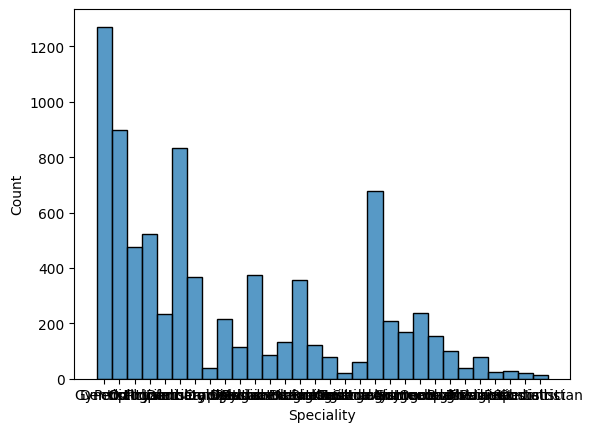

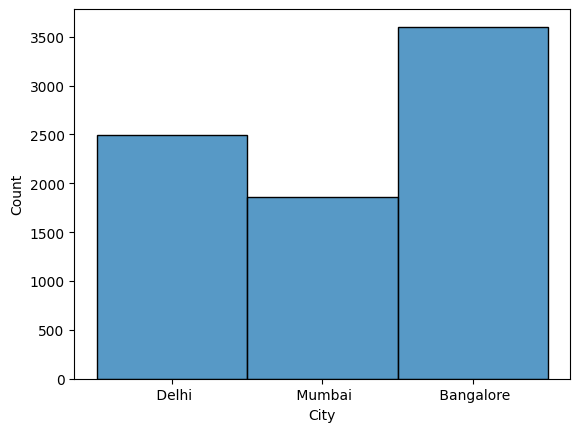

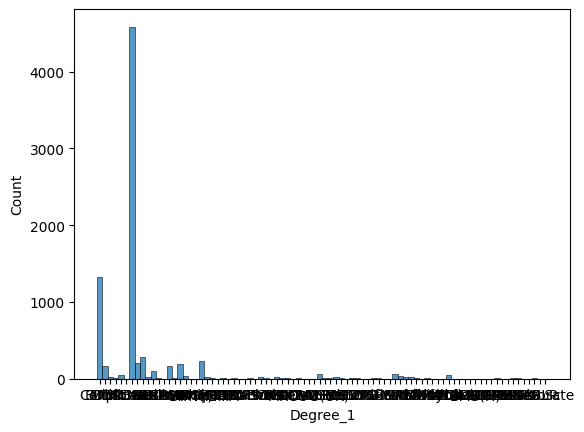

In [76]:
col = ['Speciality','City','Degree_1']
for i in col:
    plt.figure()
    sns.histplot(result[i])

In [77]:
result.head(1)

,DP Score,NPV Value,City,Consult Fee,Years of Experience,Speciality,Degree_no,Degree_1
0,100.0,122.0,Delhi,400.0,10.0,Dentist,2,BDS


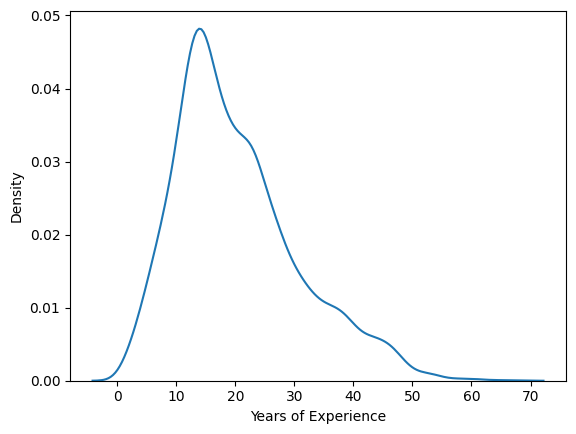

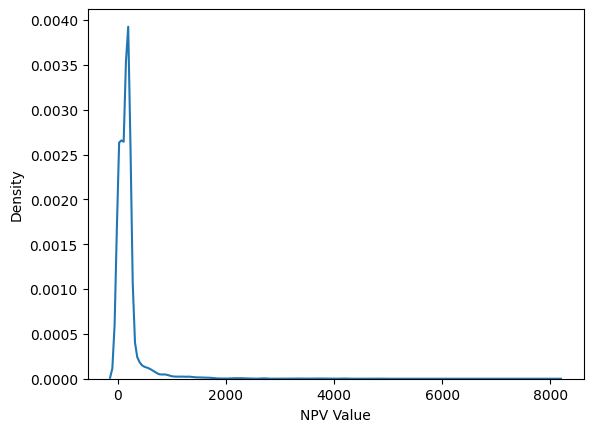

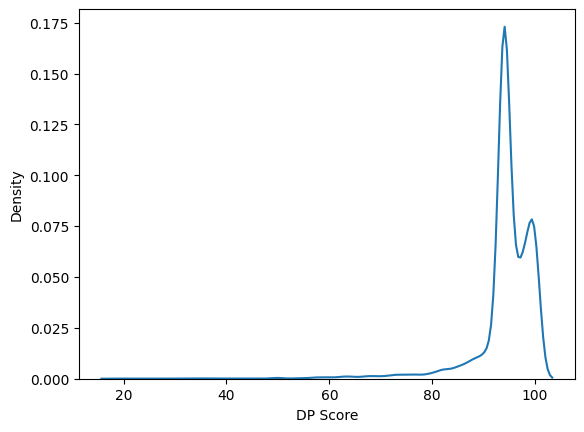

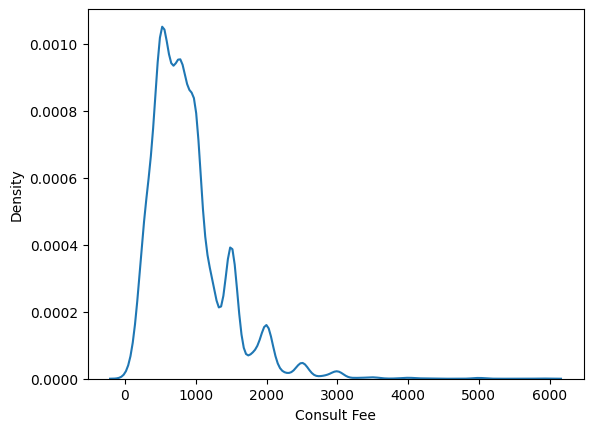

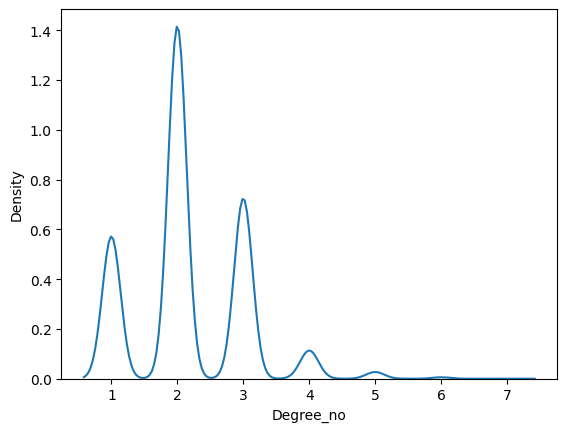

In [78]:
col = ['Years of Experience','NPV Value','DP Score','Consult Fee','Degree_no']
for i in col:
    plt.figure()
    sns.kdeplot(result[i])

In [79]:
col = ['Years of Experience','NPV Value','DP Score']

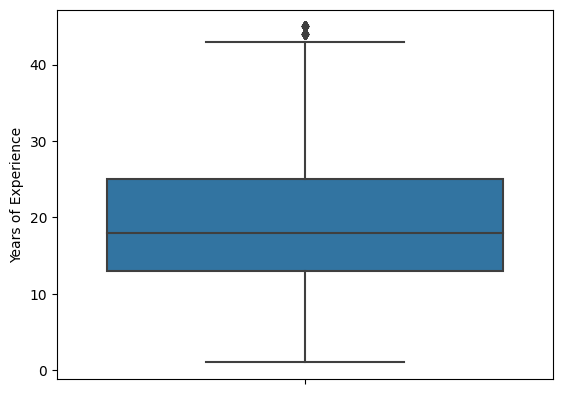

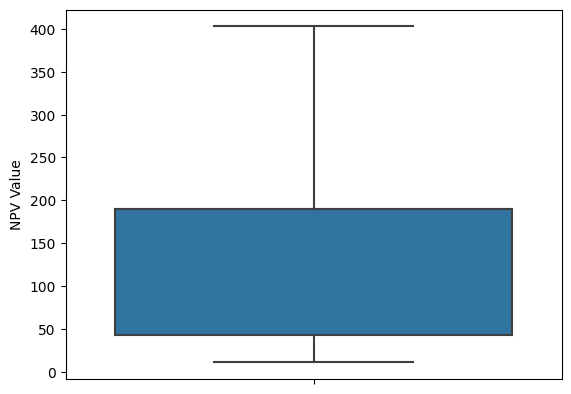

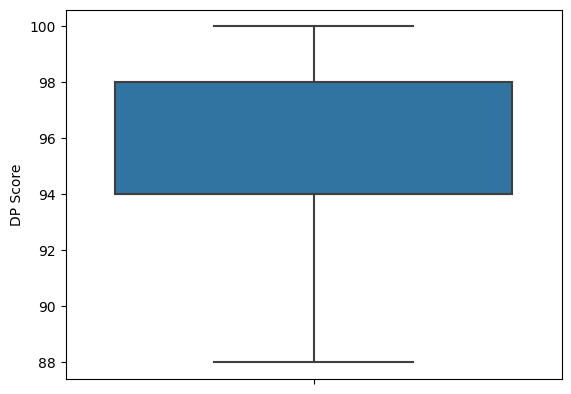

In [80]:
for c in col:
    percentile25=result[c].quantile(0.25)
    percentile75=result[c].quantile(0.75)
    iqr=percentile75-percentile25
    upper_limit=percentile75+(1.5*iqr)
    lower_limit=percentile25-(1.5*iqr)
    result=result[result[c]<=upper_limit]
    result=result[result[c]>=lower_limit]
    plt.figure()
    sns.boxplot(y=c, data=result)

In [81]:
result.replace({'99%':np.nan,'BSAM':np.nan,'DUMS':np.nan,'MVSc':np.nan,'GHMS':np.nan,'FRCP':np.nan,'Fellow':np.nan,'LCEH':np.nan},regex=True,inplace=True)
result.Degree_1=result.Degree_1.str.replace('.','')
result.Degree_1=result.Degree_1.str.replace('-','')
result.dropna(inplace=True)

C:\Users\Shashank\AppData\Local\Temp\ipykernel_1556\223717307.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  result.Degree_1=result.Degree_1.str.replace('.','')


In [82]:
result['Fee'] = result['Consult Fee']
result.drop(columns='Consult Fee',inplace=True)
result.head(1)

,DP Score,NPV Value,City,Years of Experience,Speciality,Degree_no,Degree_1,Fee
0,100.0,122.0,Delhi,10.0,Dentist,2,BDS,400.0


In [83]:
x=result.iloc[:,:-1]
result.Degree_1.unique()

array(['BDS', 'MDS', 'PhD', 'Certificate', 'Diploma', 'MBBS', 'MS', 'MD',
       'DGO', 'DNB', 'FCPS', 'BAMS', 'BHMS', 'DM', 'Member', 'BPTh/BPT',
       'MPTh/MPT', 'FNB', 'MRCS', 'FRCS', 'CCT', 'DO', 'DOMS', 'Doctor',
       'MRCP', 'Bachelor', 'BVMS', 'M', 'BSc', 'Masters', 'PGD', 'DDVL',
       'MRCOG(UK)', 'DNHE', 'MSc', 'Post', 'BNYS', 'PG', 'DHMS',
       'Certification', 'MA', 'MPhil', 'BA', 'DPM', 'Professional',
       'PsyD', 'MCh', 'MNAMS', 'MVSc', 'BUMS', 'BSMS', 'MBS', 'Master',
       'BASLP', 'Ph', 'MASLP', 'Doctorate'], dtype=object)

In [84]:
y=result.iloc[::,-1]
y

0        400.0
1        400.0
2        500.0
3        500.0
4       1200.0
         ...  
7946     500.0
7947     900.0
7948     700.0
7949     750.0
7950     850.0
Name: Fee, Length: 6643, dtype: float64

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=55)

In [86]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [87]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR

In [88]:
from sklearn.preprocessing import OneHotEncoder

# ohe=OneHotEncoder()
# ohe.fit(x[['City','Speciality','Degree_1']])

# # result = pd.get_dummies(result,drop_first=True)

In [89]:

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first'), [2, 4, 6])
], remainder='passthrough')

step2 = StandardScaler()

step3 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
    ('step3', step3)
])


In [90]:
# categories_

In [91]:
pipe.fit(x_train,y_train)

C:\Users\Shashank\.conda\envs\Linldin_project\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [2, 4, 6])])),
                ('step2', StandardScaler()), ('step3', LinearRegression())])

In [92]:
y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.45317362089190294
MAE 259.4423433304185


In [93]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.2.0.


In [94]:
import pickle

pickle.dump(result,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))
x.head(1)

,DP Score,NPV Value,City,Years of Experience,Speciality,Degree_no,Degree_1
0,100.0,122.0,Delhi,10.0,Dentist,2,BDS


In [95]:
lm=pickle.load(open('pipe.pkl','rb'))
lm.predict([[100.0, 122.0, ' Delhi', 10.0, 'Dentist', 2, 'BDS']])

C:\Users\Shashank\.conda\envs\Linldin_project\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([444.7645326])